Importing Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve
from sklearn import preprocessing # Import label encoder 
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
!pip install linearmodels

**Jumping to final merged data -FIRMS and ACLED data**


In [5]:
#gdf_acfi = pd.read_csv("gdf_post_zscore_conflict_cleaned.csv", encoding = "latin1")
gdf_acfi = pd.read_csv("gdf_post_optimal_zscore_conflict_cleaned.csv", encoding = "latin1")

In [6]:
gdf_acfi.head()

,Unnamed: 0,grid_id,year,fireCount,acled_count,acled_event_ids,geometry,log_fireCount,log_acled_count,acled_binary,zscore,conflict_fire
0,0,"48,28",2000,0,0,[],POLYGON ((21.559566818868515 12.57641397767330...,0.0000,0.0000,0,-1.1279,0
1,1,"48,28",2001,2,0,[],POLYGON ((21.559566818868515 12.57641397767330...,1.0986,0.0000,0,-0.3172,0
2,2,"48,28",2002,1,0,[],POLYGON ((21.559566818868515 12.57641397767330...,0.6931,0.0000,0,-0.7225,0
3,3,"48,28",2003,7,1,"[SUD1707, SUD1707]",POLYGON ((21.559566818868515 12.57641397767330...,2.0794,0.6931,1,1.7094,4
4,4,"48,28",2004,9,0,[],POLYGON ((21.559566818868515 12.57641397767330...,2.3026,0.0000,0,2.5200,6


In [7]:
gdf_acfi = gdf_acfi.drop(columns = ['Unnamed: 0'])

In [8]:
gdf_acfi.head()

,grid_id,year,fireCount,acled_count,acled_event_ids,geometry,log_fireCount,log_acled_count,acled_binary,zscore,conflict_fire
0,"48,28",2000,0,0,[],POLYGON ((21.559566818868515 12.57641397767330...,0.0000,0.0000,0,-1.1279,0
1,"48,28",2001,2,0,[],POLYGON ((21.559566818868515 12.57641397767330...,1.0986,0.0000,0,-0.3172,0
2,"48,28",2002,1,0,[],POLYGON ((21.559566818868515 12.57641397767330...,0.6931,0.0000,0,-0.7225,0
3,"48,28",2003,7,1,"[SUD1707, SUD1707]",POLYGON ((21.559566818868515 12.57641397767330...,2.0794,0.6931,1,1.7094,4
4,"48,28",2004,9,0,[],POLYGON ((21.559566818868515 12.57641397767330...,2.3026,0.0000,0,2.5200,6


In [9]:
gdf_acfi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20400 entries, 0 to 20399
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   grid_id          20400 non-null  object 
 1   year             20400 non-null  int64  
 2   fireCount        20400 non-null  int64  
 3   acled_count      20400 non-null  int64  
 4   acled_event_ids  20400 non-null  object 
 5   geometry         20400 non-null  object 
 6   log_fireCount    20400 non-null  float64
 7   log_acled_count  20400 non-null  float64
 8   acled_binary     20400 non-null  int64  
 9   zscore           20400 non-null  float64
 10  conflict_fire    20400 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.7+ MB


# Panel Regression - from Datascience article
https://towardsdatascience.com/a-guide-to-panel-data-regression-theoretics-and-implementation-with-python-4c84c5055cf8

## Adding Log Columns

**now we have two new columns z-score and conflict fire 
so, conflict fire is calculated from the firecount we got and z-score calculated... 
All these fires are conflict induced fires so we take log of conflict fire and acled count**

In [10]:
# Take the log of fireCount and acled_count
gdf_acfi['log_fireCount'] = np.log(gdf_acfi['conflict_fire']+1)
gdf_acfi['log_acled_count'] = np.log(gdf_acfi['acled_count']+1)

In [11]:
gdf_acfi.head()

,grid_id,year,fireCount,acled_count,acled_event_ids,geometry,log_fireCount,log_acled_count,acled_binary,zscore,conflict_fire
0,"48,28",2000,0,0,[],POLYGON ((21.559566818868515 12.57641397767330...,0.0000,0.0000,0,-1.1279,0
1,"48,28",2001,2,0,[],POLYGON ((21.559566818868515 12.57641397767330...,0.0000,0.0000,0,-0.3172,0
2,"48,28",2002,1,0,[],POLYGON ((21.559566818868515 12.57641397767330...,0.0000,0.0000,0,-0.7225,0
3,"48,28",2003,7,1,"[SUD1707, SUD1707]",POLYGON ((21.559566818868515 12.57641397767330...,1.6094,0.6931,1,1.7094,4
4,"48,28",2004,9,0,[],POLYGON ((21.559566818868515 12.57641397767330...,1.9459,0.0000,0,2.5200,6


In [12]:
gdf_acfi.shape

(20400, 11)

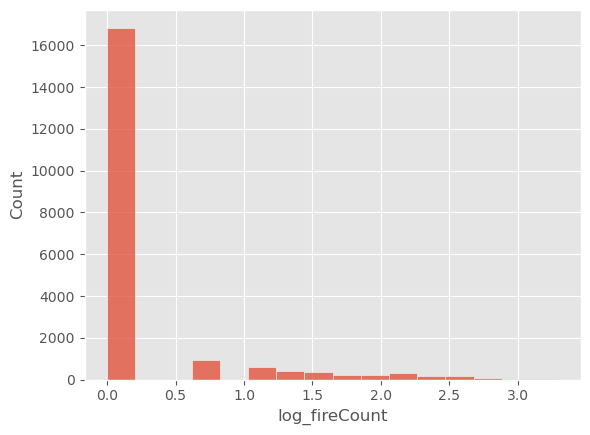

In [13]:
sns.histplot(x=gdf_acfi['log_fireCount'])
plt.show()

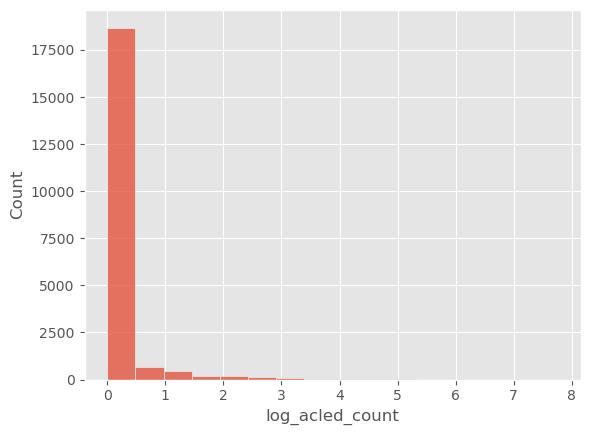

In [14]:
sns.histplot(x=gdf_acfi['log_acled_count'])
plt.show()

In [15]:
# Perform PooledOLS
from linearmodels import PooledOLS
from linearmodels import PanelOLS
from linearmodels import RandomEffects
from linearmodels.panel import compare
import statsmodels.api as sm

from scipy.stats import jarque_bera
from statsmodels.stats.diagnostic import het_white, het_breuschpagan

import scipy.stats as st
import statsmodels.graphics.tsaplots as tsap
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_white

## Step 1: Copy dataset and transform it into the right format.

In [16]:
def data_prep(data,col_list):
    data = data[column_list].copy()
    data = data.set_index(['grid_id', 'year'])
    years = data.index.get_level_values('year').to_list()
    data['year'] = pd.Categorical(years)
    return data

## Step 3: Check goodness of fit

In [49]:
def goodness_of_fit(model_name,residuals,x,y,exog_v):

    print('Mean value of residual errors='+str(residuals.mean()))

    # Plot Q-Q plot of the residual error to check normality 
    sm.qqplot(data=residuals, line='45')
    plt.show()

    # NORMALITY
    
    # Histogram of residuals
    plt.figure(figsize=(10, 6))
    plt.hist(residuals, bins=50)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title('Histogram of Residuals')
    plt.show()

    # Jarque-Bera Test
    jb_test_stat, jb_p_value = jarque_bera(residuals)
    print(f"Jarque-Bera Test Statistic: {jb_test_stat}")
    print(f"p-value: {jb_p_value}")
    # Interpretation
    if jb_p_value < 0.05:
        print("The null hypothesis of normality is rejected. The data is not normally distributed.")
    else:
        print("The null hypothesis of normality is not rejected. The data is normally distributed.")

    # HETEROSKEDASITY
    
    #  Residual versus X - to check heteroskedasity  
    fig, ax = plt.subplots()
    fig.suptitle('Raw residuals of Pooled OLS versus X')
    plt.ylabel('Residuals')
    plt.xlabel('X = '+str(exog_v[0]))
    #ax.scatter(x[exog_vars[0]], residuals_pooled_OLS, s=4, c='black', label='Residual Error')
    ax.scatter(x[exog_v[0]], residuals, s=4, label='Residual Error')
    plt.show()

    # White Test
    white_test_results = het_white(residuals, x)
    labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'] 
    white_test_r = dict(zip(labels, white_test_results))
    print(white_test_r)
    # Interpretation
    if white_test_results[1] < 0.05:
        print("The LM test’s p-value is < .001 indicating a rejection of the Null hypothesis of the White test that the residuals are homoskedastic.")
    else:
        print("The null hypothesis is not rejected. The data is normally homoskedastic.")

    #Are the residual errors correlated with the response variable y?
    fig, ax = plt.subplots()
    fig.suptitle('Raw residuals of Pooled OLS versus y')
    plt.ylabel('Residuals')
    plt.xlabel('y = log_acled_count')
    #ax.scatter(y, residuals_pooled_OLS, s=4, c='black', label='Residual Error')
    ax.scatter(y, residuals, s=4, label='Residual Error')
    plt.show()

    # Pearson's Test of Correation
    p_results = st.pearsonr(x=y, y=residuals)
    labels = ['Pearson\'s r:', 'p-value:']
    pearsons_test_r = dict(zip(labels, p_results))
    print('Results of the Pearson\'s r test of correlation between the residual errors and the response variable y ===>')
    #print(lzip(keys,results))
    print(pearsons_test_r)

    # Store Model Results
    goodnessoffit_performance.loc[len(goodnessoffit_performance.index)] = [model_name,residuals.mean(),jb_test_stat, jb_p_value,
                                                                   white_test_results[0],white_test_results[1],p_results[0],
                                                                  p_results[1]]
    

In [50]:
col_names = ['Regression Model','Mean Residual Errors','Jarque-Bera Test Statistic','Jarque-Bera Test p-value',
             'White Test Statistic','White Test p-value','Pearson\'s Test Statistic','Pearson\'s Test p-value']
goodnessoffit_performance = pd.DataFrame(columns=col_names)

## Model: Pooled OLS with Actual Data

The Pooled OLS regression model is often a good starting point and can act as a reference model. Our dependent (endogenous) and explanatory (exogenous) variables are as follows:

Dependent variable y = count of ACLED events in grids 
Explanatory variabl xX =  count of FIRMS fires in grid=

The Pooled OLS regression model equations as follows:

log_acled_count = beta_cap_1 * fireCount + beta_cap_0 + epsilon
** 

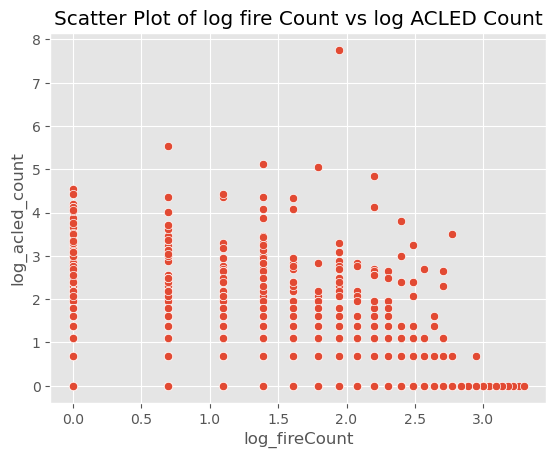

In [19]:
sns.scatterplot(x=gdf_acfi['log_fireCount'],  
                y=gdf_acfi['log_acled_count'])
                #hue=df_panel['COUNTRY']).set(title=                 
                #'Y-o-Y % Change in per-capita GDP versus Y-o-Y % Change in Gross capital formation')
# Set the title (optional)
plt.title('Scatter Plot of log fire Count vs log ACLED Count')



# Save the figure
plt.savefig('scatterplot_Log_Value.png', dpi=300, bbox_inches='tight')

plt.show()

The log values of acled count are linearly??? related to firecount across with skewness towards right. There are signs of heteroskedascity in the reponse variable, specifically as variance is not constant for differenct values fire count. This does not bode well for using OLS regression.

The objective of training the model on the panel data set is to find the fitted coefficients β_cap_1 and β_cap_0. The ‘cap’ in β_cap signifies that it is the value of the coefficient that the model has estimated and it not the true (population level) value β which is always unknown.

ε is the residual error of the fitted model and it is a random variable with a certain mean and variance. If the OLS estimation technique does its job correctly, ε will have a mean value of zero and ε will have a constant variance conditioned upon GCF_GWTH_PCNT (i.e. ε will not be heteroskedastic), and ε will not be auto-correlated. 

In [20]:
column_list = ['grid_id', 'year', 'log_fireCount', 'log_acled_count']

In [21]:
gdf_regression = data_prep(gdf_acfi,column_list)

In [22]:
#exog

exog_vars = ['log_fireCount','year']
#x = sm.add_constant(gdf_regression[exog_vars])
x = sm.tools.tools.add_constant(gdf_regression[exog_vars[0]]) 

#endog

y = gdf_regression['log_acled_count']                               

In [23]:
# MODEL RUN

model_POOLED = PooledOLS(y,x)
results_POOLED = model_POOLED.fit(cov_type='clustered', cluster_entity=True)
#results_POOLED = model_POOLED.fit(cov_type='robust')
#results_POOLED = model_POOLED.fit(cov_type='clustered', cluster_time=True)

# Store values for checking homoskedasticity graphically
fittedvals_POOLED = results_POOLED.predict().fitted_values
residuals_POOLED = results_POOLED.resids

In [24]:
print(results_POOLED)

                          PooledOLS Estimation Summary                          
Dep. Variable:        log_acled_count   R-squared:                        0.0158
Estimator:                  PooledOLS   R-squared (Between):              0.0449
No. Observations:               20400   R-squared (Within):              -0.0112
Date:                Sat, Aug 17 2024   R-squared (Overall):              0.0158
Time:                        11:32:02   Log-likelihood                -1.286e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      327.94
Entities:                         850   P-value                           0.0000
Avg Obs:                       24.000   Distribution:                 F(1,20398)
Min Obs:                       24.000                                           
Max Obs:                       24.000   F-statistic (robust):             58.222
                            

**Analysis of goodness-of-fit via R-squared, F-test, Log-Likelihood and AIC**

The R-squared which measures the fraction of the total variance in y that is explained b x is 0.01589or 1.58% that is very low..

The F-test for regression that measures the joint significance of the model’s parameters has produced a test statist327.941.4 with a p-valu 35 thereby leading us to conclude that the model’s coefficient estimates are jointly significant at a p0.005es.

**Log-likelihood**

The Log-likelihood of the model is -1.286e+04. These goodness-of-fit values by themselves are meaningless unless we compare them to that of a competing model. A Fixed Effects model is applied on the same data panel and use compare the quality of fit of the FE model with the Pooled OLSR model using these two measures.

Mean value of residual errors=1.3235599979845004e-17


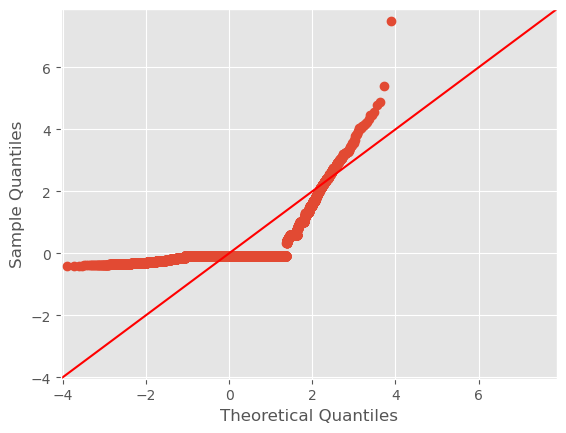

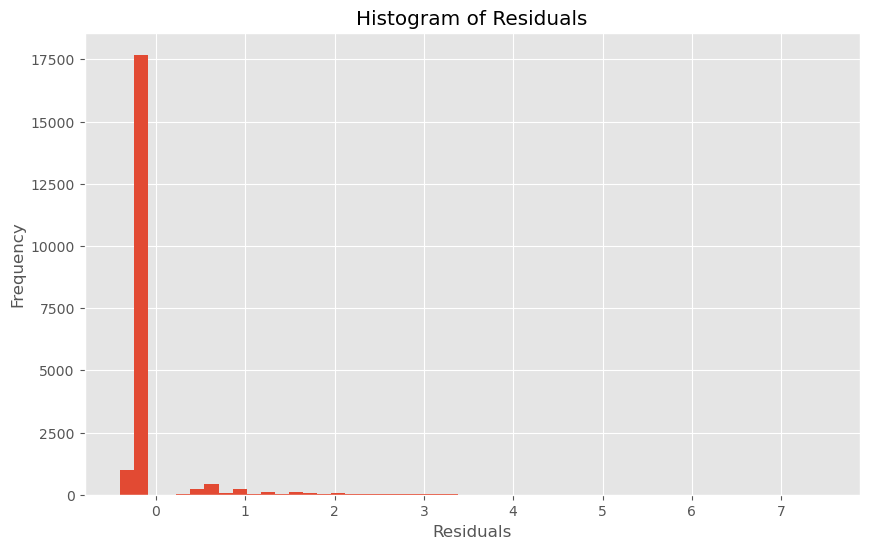

Jarque-Bera Test Statistic: 855445.0933139281
p-value: 0.0
The null hypothesis of normality is rejected. The data is not normally distributed.


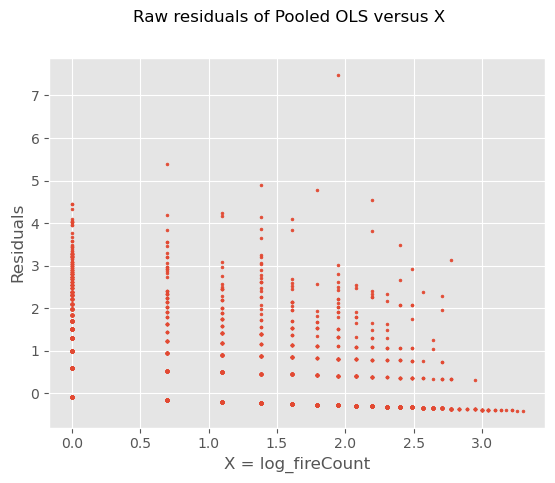

{'LM-Stat': 199.70875870755003, 'LM p-val': 4.3032249843919236e-44, 'F-Stat': 100.82675300817279, 'F p-val': 2.6701604537946883e-44}
The LM test’s p-value is < .001 indicating a rejection of the Null hypothesis of the White test that the residuals are homoskedastic.


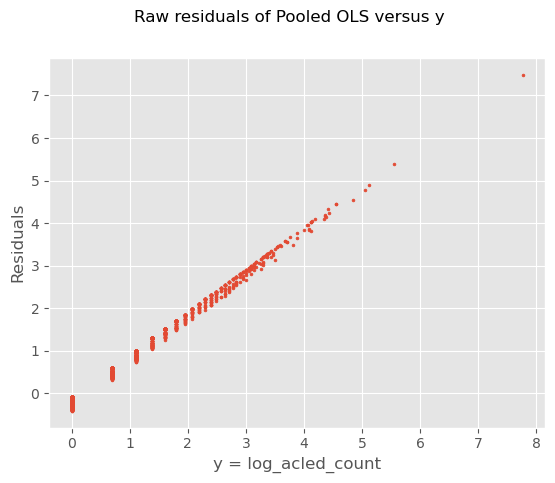

Results of the Pearson's r test of correlation between the residual errors and the response variable y ===>
{"Pearson's r:": 0.9920571322274081, 'p-value:': 0.0}


In [52]:
# Check Goodness of fit
goodness_of_fit('POOLED',residuals_POOLED,x,y,exog_vars)

In [53]:
goodnessoffit_performance

,Regression Model,Mean Residual Errors,Jarque-Bera Test Statistic,Jarque-Bera Test p-value,White Test Statistic,White Test p-value,Pearson's Test Statistic,Pearson's Test p-value
0,POOLED,0.0000,"855,445.0933",0.0000,199.7088,0.0000,0.9921,0.0000
1,POOLED,0.0000,"855,445.0933",0.0000,199.7088,0.0000,0.9921,0.0000


**Analysis of residual errors**

Let’s analyze the residual errors of the fitted model for **normality, heteroskedasticity and correlation** — the three properties that impact the goodness-of-fit of the linear model.

The mean is practically zero which is the expected outcome of using the OLS estimation technique.

**normality**

Here is where we observe the first sign of a problem. The Q-Q plot of the residuals is a visual test of normality and it clearly shows that the residuals of the fitted model are not normally distributed. If the data is not normally distributed, the points will deviate from the reference line.

Even though the residual errors are not normally distributed, the Pooled OLS estimator is still the Best Linear Unbiased Estimator (BLUE) for the panel data regression problem. Non-normality of residual errors does not affect the BLUE-ness of OLS regression model.

One disadvantage of having residual errors that are not normally distributed is that one cannot build reliable confidence intervals for the model’s predictions. We can tolerate small departures from normality but large departures invalidate the use of either the Normal or the Student’s t-distributions. Consequently, reliable confidence intervals cannot (and therefore should not) be calculate

**heteroskedasticity**

The OLS estimator is not efficient (although it’s still unbiased) if the residual errors of the OLSR model are heteroskedastic, i.e. the variance of residual errors is not constant across all values of X.

When the residuals are heteroskedastic, the OLS estimator becomes inefficient i.e. it loses the ability to generate predictions having the lowest possible variance amongst all possible linear unbiased estimators. When the residuals are heteroskedastic, the OLS estimator will under or over-estimate the variance in the parameter estimates, causing the standard errors of the parameter estimates to be miss-specified. Since standard errors are used for calculating confidence intervals, the confidence intervals of the parameter estimates also become incorrect. The same kind of miss-specification is seen for the standard errors and confidence intervals associated with the model’s predictions.

**correlation**

There seems to be what looks like a linear trend between the residual errors and y. A correlation test using Pearson’s r confirms this visual judgement:
The first value of 0.61499 is the amount of correlation (~ 61%) seen between the residuals and y, and the second value of 3.99645e-18 is the p-value of the result. We will ignore the reported p-value as we know that the residuals are far from being normally distributed. At any rate, the reported correlation (61%) by itself is obviously much greater than zero and therefore, significant.

The high degree of correlation between the residual errors of regression and the response variable indicate that our Pooled OLSR model is missing importan**t explanatory variabl**es which would have otherwise been able to “explain” some of this correlation. Whatever variance in the (y) y thae (Xhas s not been able to explain has leaked into the residuals in the form of both a correlation with y, and heteroskedasticit

Ref: https://medium.com/towards-data-science/how-to-build-a-pooled-ols-regression-model-for-panel-data-sets-a78358f9c2a


---------------------------------------------

Simple OLS requires that there is no correlation between unobserved, independent variable(s) and the IVs (i.e. exogeneity). Let´s write this down: 

Ref: https://towardsdatascience.com/a-guide-to-panel-data-regression-theoretics-and-implementation-with-python-4c84c5055cf8y
y = m1x1 + m2x2 +c
x1, x2 - observered IV - ideaally x1 and x2 should be uncorrelated 

y = m1x1 + n1z1 + c

x1 - observed IV
z1 - un observed IV

-----------------------------------------
.c2a




## Fixed Effect Model

Ref: https://towardsdatascience.com/understanding-the-fixed-effects-regression-model-d2fccc2cc27e

The Fixed Effects regression model is used to estimate the effect of intrinsic characteristics of individuals in a panel data set. Examples of such intrinsic characteristics are genetics, acumen and cultural factors. Such factors are not directly observable or measurable but one needs to find a way to estimate their effects since leaving them out leads to a sub-optimally trained regression model. The Fixed Effects model is designed to address this problem.

we can express the general form of the linear regression model

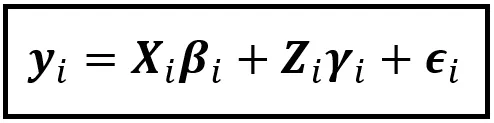

In the above equation:

y_i is a matrix of size [T x 1] containing the T observations for country i.
X_i is a matrix of size [T x k] containing the values of k regression variables all of which are observable and relevant.
β_i is a matrix of size [k x 1] containing the population (true)values of regression coefficients for the k regression variables.
Z_i is a matrix of size [T x m] containing the (theoretical) values of all the variables (m in number) and effects that cannot be directly observed.
γ_i is a matrix of size [m x 1] containing the (theoretical) population values of regression coefficients for the m unobservable variables.
ε_i is a matrix of size [T x 1] containing the errors corresponding to the T observations for cou

All unit-specific effects are assumed to be introduced by the term Z_iγ_i. The matrix Z_i and its coefficients vector γ_i are purely theoretical terms since what they represent cannot be in reality observed and measured.
Since z_i is not directly observable, in order to measure the effects of z_i, we need to formalize the effect of leaving out z_i. Fortunately, there is a well-studied concept in statistics called the omitted-variable bias which we can use for this purpose.

Omitted variable bias
While training the model on the panel data set, if we leave out z_i from the model, it will cause what is known as the omitted variable bias. It can be shown that if the regression model is estimated without considering z_i, then the estimated values β_cap_i of the coefficients β_i will be biased as follo

![image.png](attachment:d0930131-d735-491d-91fd-ea0d87ec99bc.png)

The above equation suggests an approach for constructing the following two kinds of models — the Fixed Effects model, and the Random Effects model depending on whether or not the Covariance term in the above equation is zero, i.e. whether or not the unobservable effects z_i are correlated with the regression variables.
The Fixed Effects Regression Model

In this model, we assume that the unobservable individual effects z_i are correlated with the regression variables. In effect, it means that the Covariance(X_i, z_i) in the above equation is non-zero

we also assume that the bias introduced due to the omission of the unit-specific factors is group-specific.

To compensate for this bias, we will introduce a group-specific intercept called c_i into the model. c_i is assumed to act in a direction that is opposite (in a vector sense) to the effect of the omitted-variable bias.

With these two assumptions in place, we will express the Fixed Effects regression model’s equation as foll

![image.png](attachment:7cf1dfc1-ec3f-4c31-8e41-9cdd01c.png)ows:.

ws:
ntry i.

In [54]:
column_list = ['grid_id','year','log_fireCount', 'log_acled_count']

In [55]:
gdf_regression = data_prep(gdf_acfi,column_list)

In [56]:
#exog

exog_vars = ['log_fireCount','year']
#x = sm.add_constant(gdf_regression[exog_vars])
x = sm.tools.tools.add_constant(gdf_regression[exog_vars[0]]) 

#endog

y = gdf_regression['log_acled_count']                               

In [57]:
# Run the fixed effects model
#model_FE = PanelOLS(y, x) - same as PooledOLS

model_FE_ET = PanelOLS(y, x, entity_effects=True, time_effects=True)
results_FE_ET = model_FE_ET.fit(use_lsdv = True)

model_FE_E = PanelOLS(y, x, entity_effects=True, time_effects=False)
results_FE_E = model_FE_E.fit(use_lsdv = True)

model_FE_T = PanelOLS(y, x, entity_effects=False, time_effects=True)
results_FE_T = model_FE_T.fit(use_lsdv = True)

In [58]:
#Compare Results
# print(compare({'Fixed Effect_ET': results_FE_ET, 'Fixed Effect_E': results_FE_E, 'Fixed Effect_T': results_FE_T}))

The results presented compare three different fixed-effects models using panel data. Each model explains the log-transformed count of some dependent variable (referred to as `log_acled_count`) based on the independent variable `log_fireCount`. Here’s an interpretation of the results:

### 1. **Model Specifications**
   - **Fixed Effect_ET**: Includes both entity (e.g., country, region) and time (e.g., year, month) fixed effects.
   - **Fixed Effect_E**: Includes only entity fixed effects.
   - **Fixed Effect_T**: Includes only time fixed effects.

### 2. **R-squared Values**
   - **R-Squared (Within)**: Measures the variation within entities over time that is explained by the model. It is relatively low for all models, suggesting that within-entity variations are not well-explained by the independent variable.
   - **R-Squared (Between)**: Measures the variation between entities that is explained by the model. It is higher than the within R-squared, indicating that differences between entities are somewhat better explained by the independent variable.
   - **R-Squared (Overall)**: Combines the within and between variations. This is also relatively low across all models, indicating that overall, the model explains a small portion of the variation in `log_acled_count`.

### 3. **F-statistic and P-value**
   - The F-statistics are very high, especially for the model with time fixed effects (Fixed Effect_T). The p-values for all models are 0.0000, which means the models are statistically significant as a whole.
   - The higher F-statistic in the Fixed Effect_T model suggests that including time effects significantly improves the model’s explanatory power.

### 4. **Coefficients**
   - **const (Constant term)**: This represents the intercept of the models. It is positive and significant across all models, but its magnitude slightly decreases when more fixed effects are added.
   - **log_fireCount (Independent Variable)**: The coefficient is positive and statistically significant across all models, indicating that an increase in `log_fireCount` is associated with an increase in `log_acled_count`. The magnitude of this effect is smallest in the entity-time fixed effects model (0.0333) and largest in the time fixed effects model (0.0697). This suggests that the relationship between `log_fireCount` and `log_acled_count` is more pronounced when controlling for time-specific effects.

### 5. **Effects**
   - The models control for different effects:
     - **Fixed Effect_ET**: Controls for both entity and time effects, considering the unique characteristics of each entity and each time period.
     - **Fixed Effect_E**: Controls only for entity-specific effects, ignoring time-specific variations.
     - **Fixed Effect_T**: Controls only for time-specific effects, ignoring entity-specific variations.

### **Summary:**
- The model with time fixed effects (Fixed Effect_T) seems to capture more variation in the data, as evidenced by the higher R-squared values and F-statistic. The positive and significant coefficient for `log_fireCount` across all models suggests that there is a consistent relationship between fire counts and the outcome variable, but the strength of this relationship varies depending on whether entity or time effects are accounted for.
  
- Overall, the models explain only a small portion of the variation in `log_acled_count`, indicating that other variables not included in these models might be important.


In [59]:
# Store values for checking homoskedasticity graphically

fittedvals_FE_ET = results_FE_ET.predict().fitted_values
residuals_FE_ET = results_FE_ET.resids

fittedvals_FE_E = results_FE_E.predict().fitted_values
residuals_FE_E = results_FE_E.resids

fittedvals_FE_T = results_FE_T.predict().fitted_values
residuals_FE_T = results_FE_T.resids

Mean value of residual errors=4.0664639411760635e-17


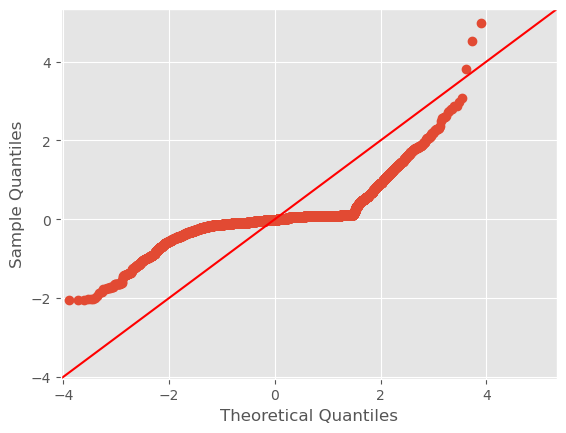

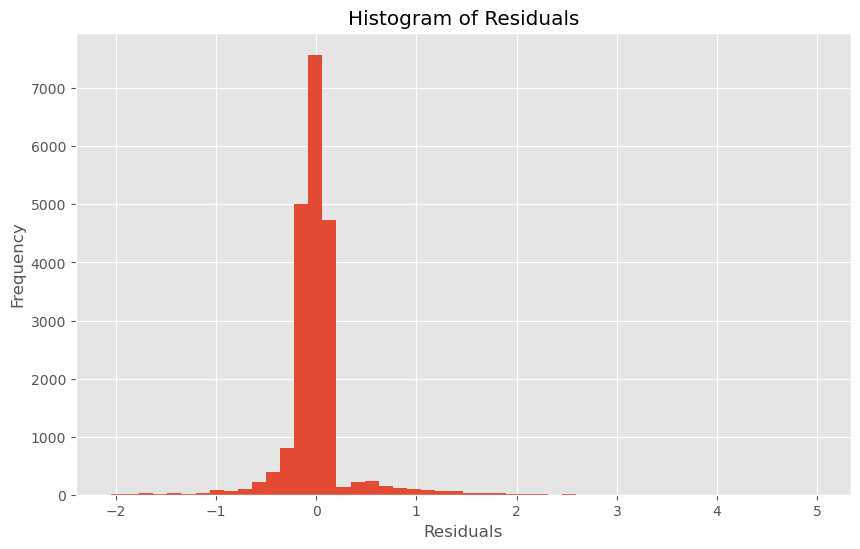

Jarque-Bera Test Statistic: 400728.3288223043
p-value: 0.0
The null hypothesis of normality is rejected. The data is not normally distributed.


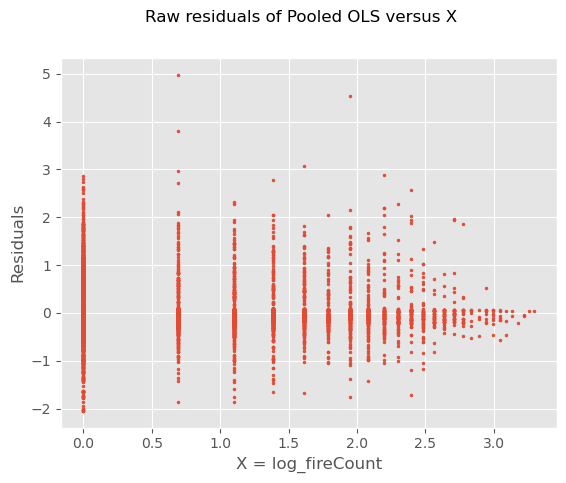

{'LM-Stat': 249.66081226299482, 'LM p-val': 6.1212968836945785e-55, 'F-Stat': 126.35845829402656, 'F p-val': 2.8866604585416132e-55}
The LM test’s p-value is < .001 indicating a rejection of the Null hypothesis of the White test that the residuals are homoskedastic.


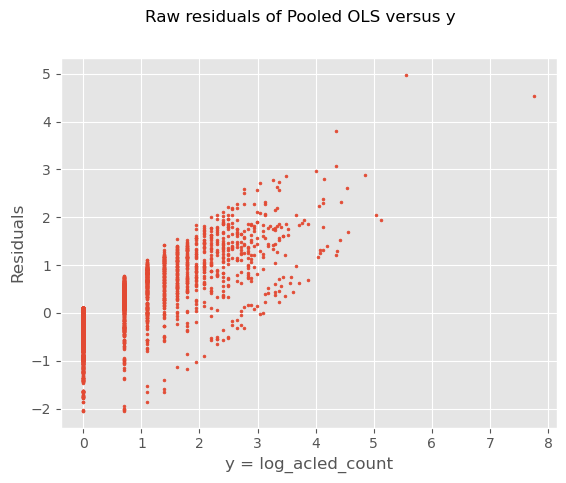

Results of the Pearson's r test of correlation between the residual errors and the response variable y ===>
{"Pearson's r:": 0.6985197886958519, 'p-value:': 0.0}


In [60]:
goodness_of_fit('Fixed Effect ET',residuals_FE_ET,x,y,exog_vars)

### goodness_of_fit('Fixed Effect E',residuals_FE_E,x,y,exog_vars)

Mean value of residual errors=3.483052626275001e-17


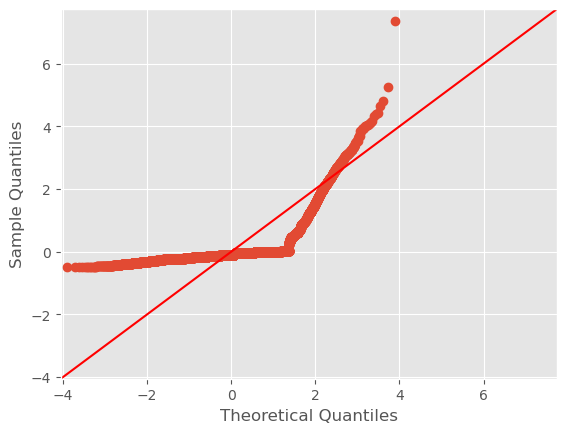

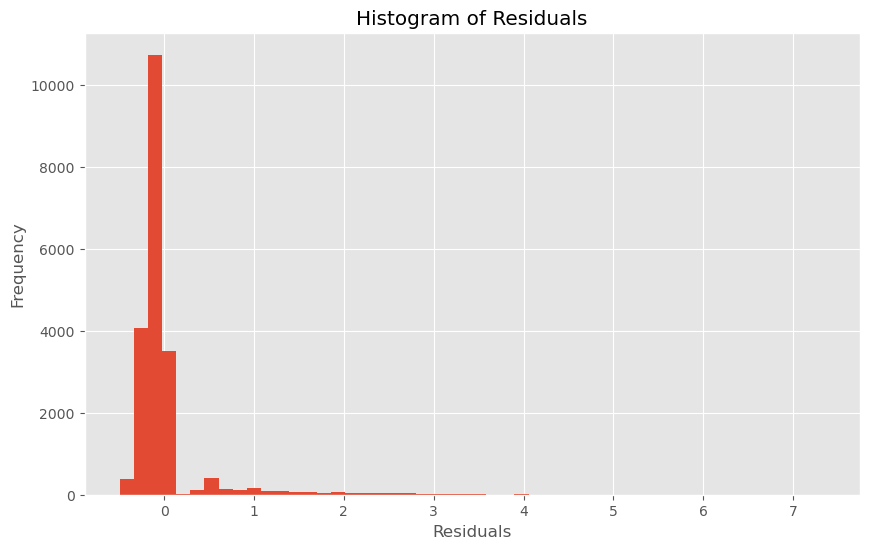

Jarque-Bera Test Statistic: 801918.2211623129
p-value: 0.0
The null hypothesis of normality is rejected. The data is not normally distributed.


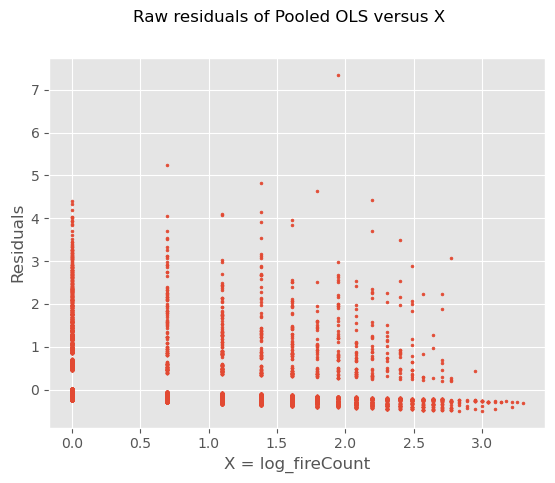

{'LM-Stat': 196.16783528748294, 'LM p-val': 2.5275270016542215e-43, 'F-Stat': 99.0216931060049, 'F p-val': 1.595359537696666e-43}
The LM test’s p-value is < .001 indicating a rejection of the Null hypothesis of the White test that the residuals are homoskedastic.


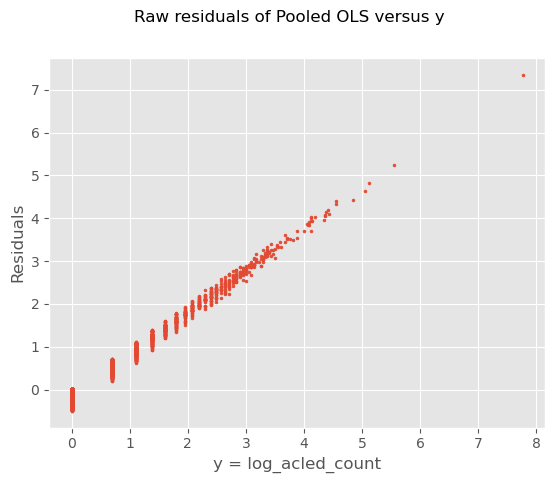

Results of the Pearson's r test of correlation between the residual errors and the response variable y ===>
{"Pearson's r:": 0.978057426390143, 'p-value:': 0.0}


In [62]:
goodness_of_fit('Fixed Effect T',residuals_FE_T,x,y,exog_vars)

In [63]:
goodnessoffit_performance

,Regression Model,Mean Residual Errors,Jarque-Bera Test Statistic,Jarque-Bera Test p-value,White Test Statistic,White Test p-value,Pearson's Test Statistic,Pearson's Test p-value
0,POOLED,0.0000,"855,445.0933",0.0000,199.7088,0.0000,0.9921,0.0000
1,POOLED,0.0000,"855,445.0933",0.0000,199.7088,0.0000,0.9921,0.0000
2,Fixed Effect ET,0.0000,"400,728.3288",0.0000,249.6608,0.0000,0.6985,0.0000
3,Fixed Effect E,-0.0000,"453,393.9286",0.0000,263.6354,0.0000,0.7189,0.0000
4,Fixed Effect T,0.0000,"801,918.2212",0.0000,196.1678,0.0000,0.9781,0.0000


## Random Effect Model

In [64]:
# Random Effects odel
model_RE = RandomEffects(y,x) 
results_RE = model_RE.fit() 

# Store values for checking homoskedasticity graphically
fittedvals_RE = results_RE.predict().fitted_values
residuals_RE = results_RE.resids

In [65]:
# Print the summary of the results - entity effect
print(results_RE)

                        RandomEffects Estimation Summary                        
Dep. Variable:        log_acled_count   R-squared:                        0.0021
Estimator:              RandomEffects   R-squared (Between):              0.0154
No. Observations:               20400   R-squared (Within):               0.0015
Date:                Sat, Aug 17 2024   R-squared (Overall):              0.0082
Time:                        12:32:36   Log-likelihood                   -6753.3
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      43.035
Entities:                         850   P-value                           0.0000
Avg Obs:                       24.000   Distribution:                 F(1,20398)
Min Obs:                       24.000                                           
Max Obs:                       24.000   F-statistic (robust):             43.035
                            

Mean value of residual errors=0.0


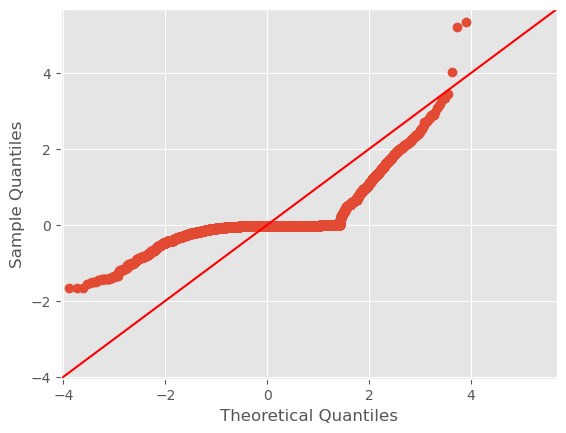

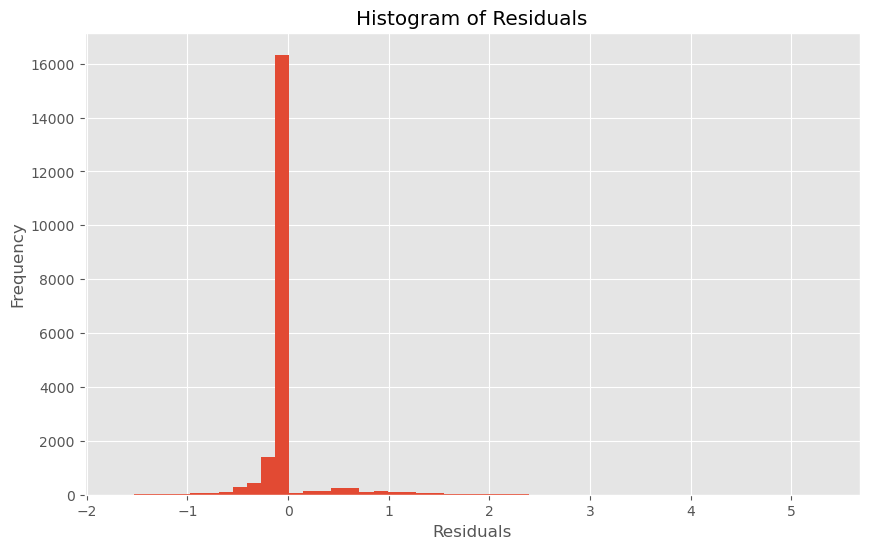

Jarque-Bera Test Statistic: 615108.2841160699
p-value: 0.0
The null hypothesis of normality is rejected. The data is not normally distributed.


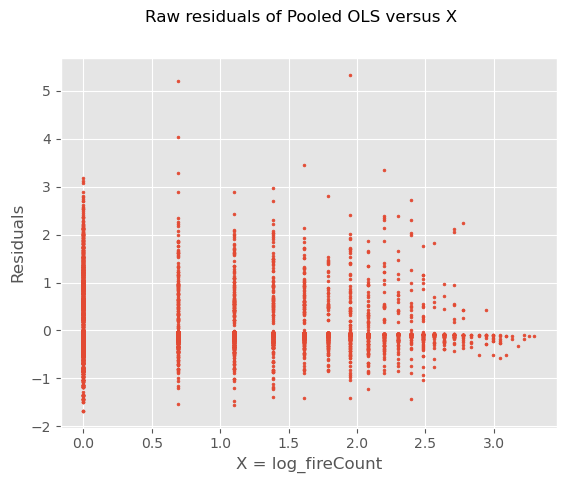

{'LM-Stat': 254.30337647076254, 'LM p-val': 6.007910228073984e-56, 'F-Stat': 128.73781599133048, 'F p-val': 2.753072820163597e-56}
The LM test’s p-value is < .001 indicating a rejection of the Null hypothesis of the White test that the residuals are homoskedastic.


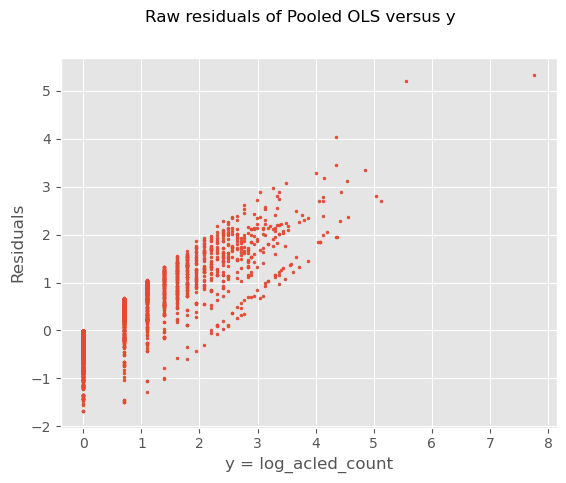

Results of the Pearson's r test of correlation between the residual errors and the response variable y ===>
{"Pearson's r:": 0.8492565904204973, 'p-value:': 0.0}


In [66]:
goodness_of_fit('Random Effects',residuals_RE,x,y,exog_vars)

In [67]:
goodnessoffit_performance

,Regression Model,Mean Residual Errors,Jarque-Bera Test Statistic,Jarque-Bera Test p-value,White Test Statistic,White Test p-value,Pearson's Test Statistic,Pearson's Test p-value
0,POOLED,0.0000,"855,445.0933",0.0000,199.7088,0.0000,0.9921,0.0000
1,POOLED,0.0000,"855,445.0933",0.0000,199.7088,0.0000,0.9921,0.0000
2,Fixed Effect ET,0.0000,"400,728.3288",0.0000,249.6608,0.0000,0.6985,0.0000
3,Fixed Effect E,-0.0000,"453,393.9286",0.0000,263.6354,0.0000,0.7189,0.0000
4,Fixed Effect T,0.0000,"801,918.2212",0.0000,196.1678,0.0000,0.9781,0.0000
5,Random Effects,0.0000,"615,108.2841",0.0000,254.3034,0.0000,0.8493,0.0000


In [68]:
from linearmodels.panel import compare

#print(compare({'POOLED': results_POOLED, 'Fixed Effect': results_FE_ET, 'Random Effects': results_RE}))

In [69]:
print(compare({'POOLED': results_POOLED, 'Fixed Effect_ET': results_FE_ET, 'Fixed Effect_E': results_FE_E, 'Fixed Effect_T': results_FE_T, 'Random Effects': results_RE}))

                                                      Model Comparison                                                     
                                     POOLED     Fixed Effect_ET      Fixed Effect_E      Fixed Effect_T      Random Effects
---------------------------------------------------------------------------------------------------------------------------
Dep. Variable               log_acled_count     log_acled_count     log_acled_count     log_acled_count     log_acled_count
Estimator                         PooledOLS            PanelOLS            PanelOLS            PanelOLS       RandomEffects
No. Observations                      20400               20400               20400               20400               20400
Cov. Est.                         Clustered          Unadjusted          Unadjusted          Unadjusted          Unadjusted
R-squared                            0.0158              0.0006              0.0015              0.0144              0.0021
R-Square

The results present a comparison of five different regression models that explain the log-transformed count of a dependent variable (`log_acled_count`) using the independent variable `log_fireCount`. The models include Pooled OLS, Fixed Effects (entity-time, entity, and time), and Random Effects. Here's an interpretation:

### 1. **Model Types**
   - **Pooled OLS**: Assumes that all observations are homogenous and ignores any individual-specific effects.
   - **Fixed Effect_ET**: Controls for both entity (e.g., countries, regions) and time effects.
   - **Fixed Effect_E**: Controls only for entity-specific effects.
   - **Fixed Effect_T**: Controls only for time-specific effects.
   - **Random Effects**: Assumes that entity-specific effects are random and uncorrelated with the independent variables.

### 2. **R-squared Values**
   - **R-Squared (Within)**: Measures how well the model explains the variation within entities over time. The values are low across all models, indicating that within-entity variations are not well explained by `log_fireCount`.
   - **R-Squared (Between)**: Measures how well the model explains the variation between entities. The Pooled OLS and Random Effects models have higher values, suggesting that differences between entities are better captured by these models.
   - **R-Squared (Overall)**: Combines within and between variations. The Pooled OLS and Random Effects models have slightly higher overall R-squared values, indicating they explain more of the total variation in `log_acled_count` compared to the fixed-effects models.

### 3. **F-statistic and P-value**
   - The F-statistic is significant (p-value = 0.0000) across all models, indicating that the independent variable (`log_fireCount`) is statistically significant in explaining the variation in `log_acled_count`.
   - The F-statistic is highest in the Pooled OLS and Fixed Effect_T models, suggesting these models provide the most statistically powerful explanations among those tested.

### 4. **Coefficients**
   - **Constant (const)**: The intercept is positive and significant across all models. The magnitude of the constant varies slightly across models, with the Fixed Effect_ET model having the highest value.
   - **log_fireCount (Independent Variable)**: The coefficient is positive and statistically significant in all models, indicating that higher fire counts are associated with higher values of `log_acled_count`.
     - **Pooled OLS**: 0.0714 (most significant)
     - **Fixed Effect_ET**: 0.0333 (lowest)
     - **Fixed Effect_E**: 0.0483
     - **Fixed Effect_T**: 0.0697
     - **Random Effects**: 0.0551
   
   This suggests that the impact of fire counts on `log_acled_count` is most pronounced when ignoring entity-specific effects (Pooled OLS) and when considering time effects (Fixed Effect_T). When controlling for entity and time simultaneously, the impact is reduced (Fixed Effect_ET).

### 5. **Model Comparisons**
   - **Pooled OLS vs. Fixed Effects**: Pooled OLS assumes no difference across entities or over time, and it shows the highest coefficient for `log_fireCount`. However, this model might suffer from omitted variable bias since it ignores entity and time effects.
   - **Fixed Effects Models**: The entity-time fixed effects model (Fixed Effect_ET) likely provides the most unbiased estimate by controlling for both entity and time-specific effects. However, it results in the lowest coefficient for `log_fireCount`, indicating that once controlling for these effects, the relationship between fire counts and the outcome variable is weaker.
   - **Random Effects**: This model assumes random variation across entities and time, providing a compromise between the Pooled OLS and Fixed Effects models. It shows a moderately strong relationship between `log_fireCount` and `log_acled_count`.

### **Summary:**
- **Best Model**: The choice of the best model depends on the context. If individual-specific and time effects are crucial, Fixed Effect_ET might be preferred for its control over these variations, despite its lower explanatory power. If the focus is on capturing the overall effect of fire counts without much concern for omitted variable bias, Pooled OLS could be more appropriate due to its higher coefficient and R-squared.
- **Significance**: All models show that `log_fireCount` is a significant predictor of `log_acled_count`, but the magnitude and interpretation of this relationship vary depending on the model chosen.
- **Trade-offs**: The key trade-off is between capturing fixed effects (which may reduce bias but also reduce the explanatory power) and using simpler models like Pooled OLS or Random Effects that might have higher explanatory power but at the risk of bias.Count`. This suggests that when controlling for these effects, the relationship between fire incidents and ACLED events is weaker.

- **Random Effects**: This model strikes a balance between the other two, showing moderate R-squared values and a significant effect of `log_fireCount`. It assumes the entity effects are random and not correlated with the independent variables, which may or may not be a valid assumption depending on the data.

In choosing between these models:
- **If you believe there are unobserved factors specific to entities or time periods that might bias the results**, the **Fixed Effects** model is preferable despite its lower explanatory power.
- **If the random effects assumption is valid (uncorrelated with independent variables)**, the **Random Effects** model might offer a good compromise between bias and efficiency.
- **If the panel structure is not important or if there's confidence that there's no significant unobserved heterogeneity**, the **Pooled OLS** model offers a simple and strong overall fit.

Choosing between PooledOLS and FE/RE: Basically, there are five assumptions for simple linear regression models that must be fulfilled. Two of them can help us in choosing between PooledOLS and FE/RE.

These assumptions are (1) Linearity, (2) Exogeneity, (3a) Homoskedasticity and (3b) Non-autocorrelation, (4) Independent variables are not Stochastic and (5) No Multicolinearity.

If assumption (2) or (3) (or both) are violated, then FE or RE might be more suitable.

I would recommend to start performing PooledOLS. Since it can be seen as a simple OLS model, it has to fulfill certain assumptions (those in the chapter “How to decide which Model is appropriate?” ). As stated above, if condition 2 or 3 (or both) are violated, then FE-/RE-models are likely more suitable. Since condition 2 can only be tested further down with the Hausman-Test, we will stick to proving condition 3 for now.



Check condition 3:

Condition 3 is splitted in 3a (Homoskedasticity) and 3b (Non-Autocorrelation). Those assumptions can be tested with a number of different tests. For condition 3a, I will show you how to identify heteroscedasticity graphically as well as perform the White-Test and Breusch-Pagan-Test (both are similar). For condition 3b, I will show you the Durbin-Watson-Test.

Basically, a residuals-plot represents predicted values (x-axis) vs. residuals (y-axis). If the plotted data points spread out, this is an indicator for growing variance and thus, for heteroskedasticity. Since this seems to be the case in our example, we might have the first violation. But let´s check this with the White- and the Breusch-Pagan-Test:



In simple terms, if p < 0.05, then heteroskedasticity is indicated. Both tests give very small p-values (White-test: 3.442621728589391e-44, Breusch-Pagan-test: 6.032616972194746e-2


** In our case p > 0.05, h heteroskedasticity is not indicated  **

